In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# convert datetime to datetime variable
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [6]:
bikes['hour'] = bikes['datetime'].apply(lambda x: x.hour)

In [9]:
def time_of_day(x):
    if x >=3 and x <= 9:
        return 'morning_commute'
    elif x >= 10 and x <= 14:
        return 'midday'
    elif x >= 15 and x <= 19:
        return 'evening_commute'
    elif x >= 20 and x <= 23:
        return 'after_hours'
    else:
        return 'late_night'

In [10]:
bikes['time_of_day'] = bikes['hour'].apply(time_of_day)

In [11]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,late_night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,late_night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,late_night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,morning_commute
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,morning_commute


In [12]:
#### hourly analysis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\anbha\AppData\Local\Temp\ipykernel_12396\2872508721.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='casual', data=bikes, palette="tab10")


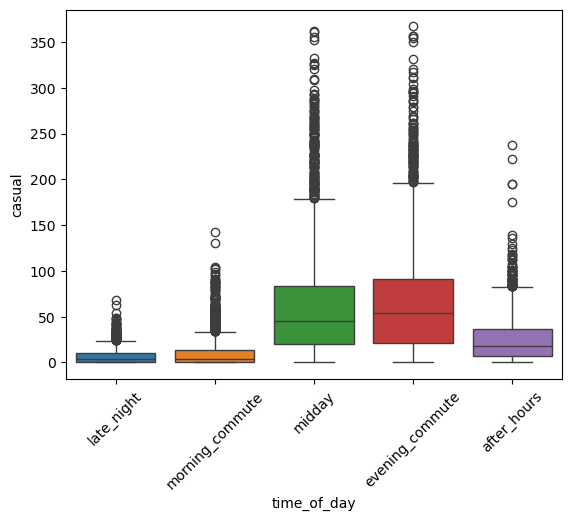

In [22]:
sns.boxplot(x='time_of_day', y='casual', data=bikes, palette="tab10")
plt.xticks(rotation=45);

In [23]:
bikes['hour'] = bikes['datetime'].apply(lambda x: x.hour)

<Axes: xlabel='season', ylabel='casual'>

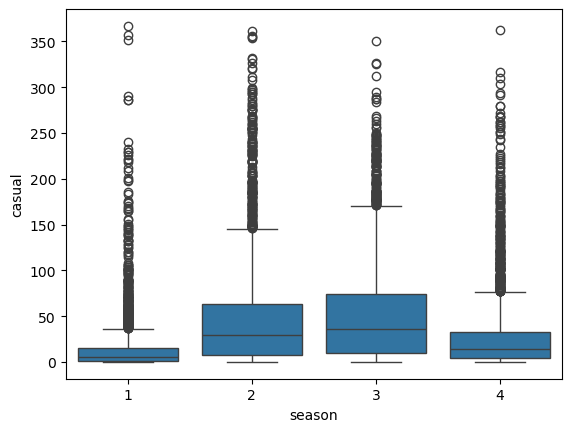

In [24]:
# season holiday workinday weather
sns.boxplot(x='season', y = 'casual', data = bikes)

<Axes: xlabel='season', ylabel='registered'>

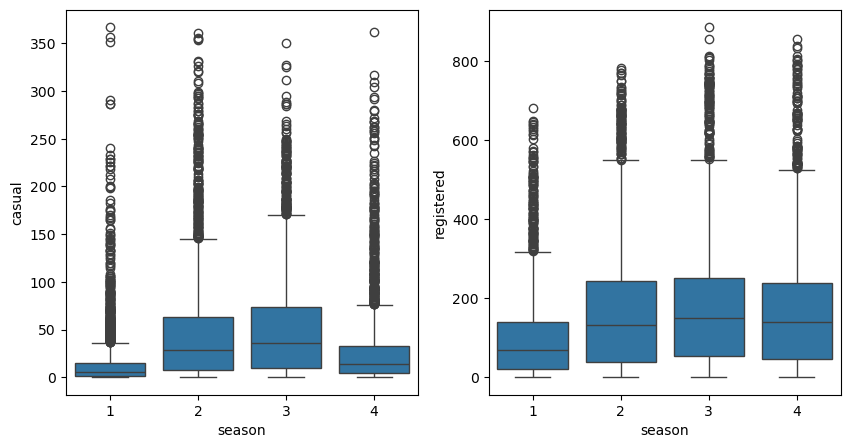

In [25]:
# season    holiday workingday  weather
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(x='season', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='season', y='registered', data=bikes, ax=ax2)

<Axes: xlabel='season', ylabel='registered'>

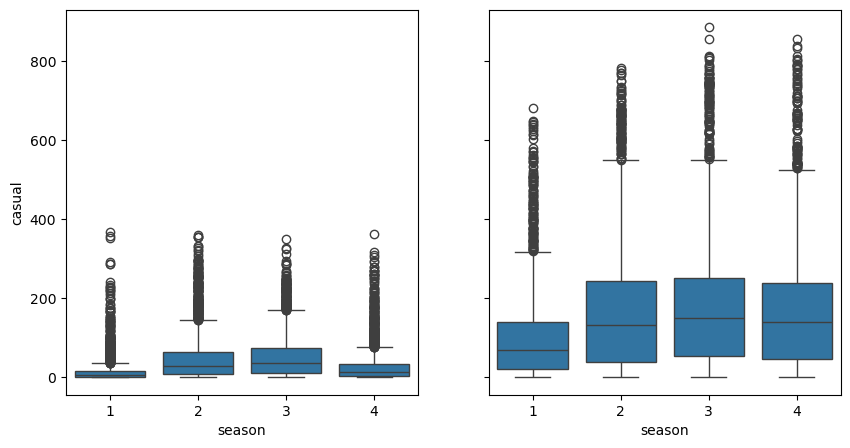

In [26]:
# season    holiday workingday  weather
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5), sharey=True)
sns.boxplot(x='season', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='season', y='registered', data=bikes, ax=ax2)

<Axes: xlabel='season', ylabel='count'>

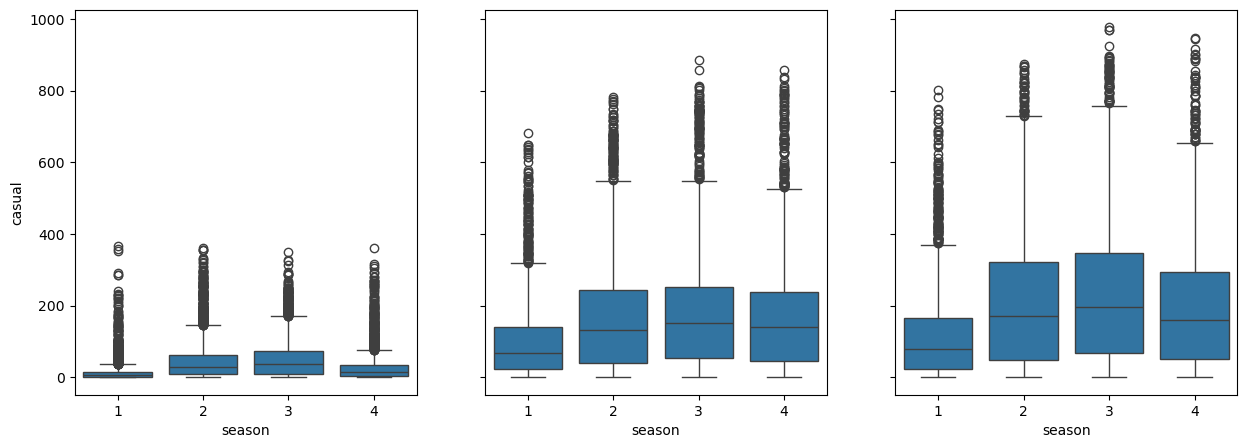

In [27]:
# season    holiday workingday  weather
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='season', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='season', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='season', y='count', data=bikes, ax=ax3)

<Axes: xlabel='holiday', ylabel='count'>

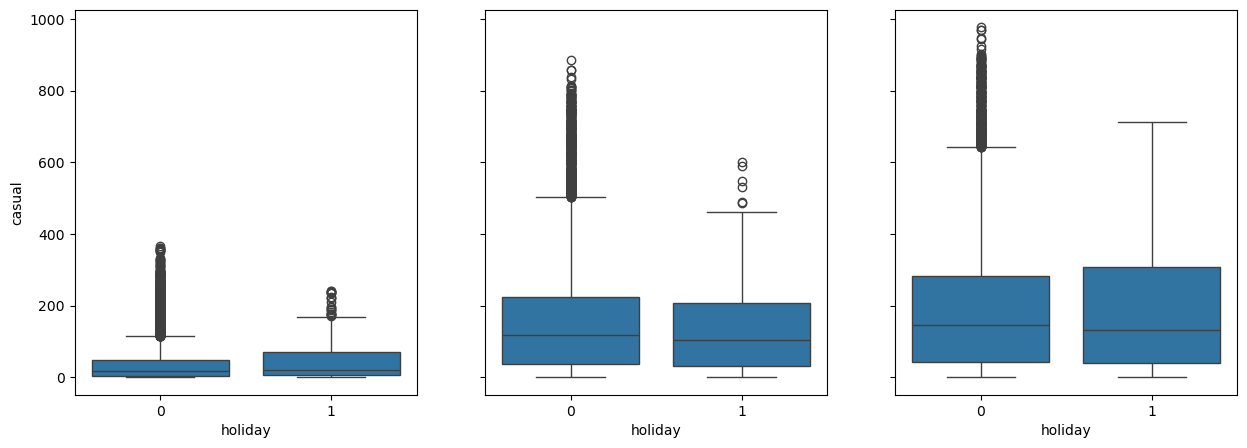

In [28]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='holiday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='holiday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='holiday', y='count', data=bikes, ax=ax3)